In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/efficientcube-1000cube/train_cube3_qtm_MLP2RB_04M_1735350897.csv
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729775893_e08192_B16777216_tests_data_0_0069.json
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729776568_e08192_B16777216_tests_data_0_0069.json
/kaggle/input/efficientcube-1000cube/2098_1024_1024_1024.xlsx
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729776388_e08192_B16777216_tests_data_0_0069.json
/kaggle/input/efficientcube-1000cube/tqdm.txt
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729762141_e08192_B262144_tests-data_0_1000_half.json
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729762141_e08192_B262144_tests_data_0_1000.json
/kaggle/input/efficientcube-1000cube/result_ours.pt
/kaggle/input/efficientcube-1000cube/logname_cube.txt
/kaggle/input/efficientcube-1000cube/cuda.txt
/kaggle/input/efficientcube-1000cube/test_cube3_qtm_MLP2RB_04M_1729776146_e08192_B16777216

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/efficientcube-1000cube/train_cube3_qtm_MLP2RB_04M_1735350897.csv')
df.head()

,epoch,train_loss,vertices_seen,data_gen_time,train_epoch_time
0,1,24.608290,999986,0.116228,2.780205
1,2,13.568259,999986,0.137915,2.589823
2,3,13.101940,999986,0.126889,1.918276
3,4,12.841603,999986,0.138207,1.911882
4,5,12.723638,999986,0.132302,1.907782


In [4]:
df.columns

Index(['epoch', 'train_loss', 'vertices_seen', 'data_gen_time',
       'train_epoch_time'],
      dtype='object')

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   epoch             8192 non-null   int64  
 1   train_loss        8192 non-null   float64
 2   vertices_seen     8192 non-null   int64  
 3   data_gen_time     8192 non-null   float64
 4   train_epoch_time  8192 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 320.1 KB


In [6]:
# Check for missing values
print(df.isnull().sum())

epoch               0
train_loss          0
vertices_seen       0
data_gen_time       0
train_epoch_time    0
dtype: int64


In [7]:
# Basic statistics
df.describe()

,epoch,train_loss,vertices_seen,data_gen_time,train_epoch_time
count,8192.000000,8192.000000,8192.0,8192.000000,8192.000000
mean,4096.500000,8.597411,999986.0,0.112326,1.894516
std,2364.971036,0.467657,0.0,0.003278,0.012924
min,1.000000,8.252591,999986.0,0.104673,1.889289
25%,2048.750000,8.350362,999986.0,0.110390,1.893142
50%,4096.500000,8.454557,999986.0,0.111410,1.893718
75%,6144.250000,8.659951,999986.0,0.113254,1.894656
max,8192.000000,24.608290,999986.0,0.147657,2.780205


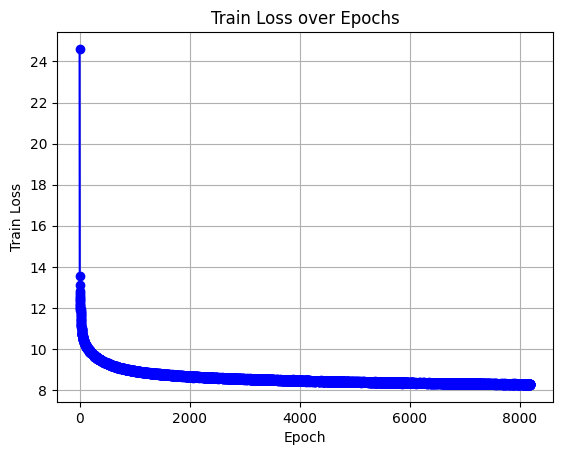

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot train loss over epochs
plt.plot(df['epoch'], df['train_loss'], color='blue', marker='o')
plt.title("Train Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.grid(True)
plt.show()

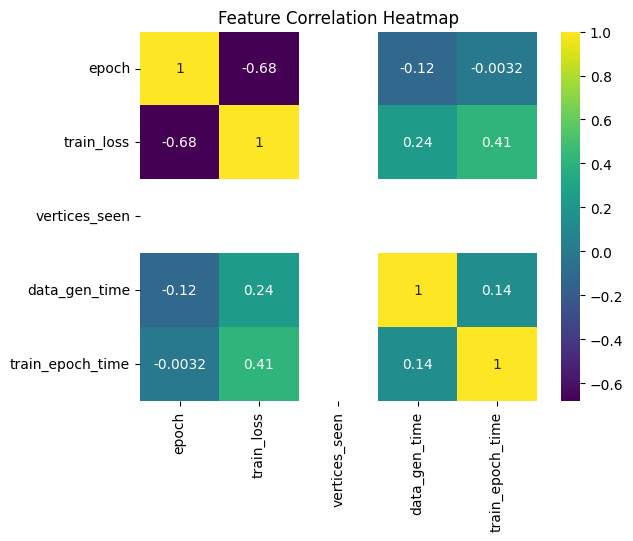

In [9]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('train_loss', axis=1)
y = df['train_loss']

In [11]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.00019330299024252523
R² Score: 0.9989580691312693


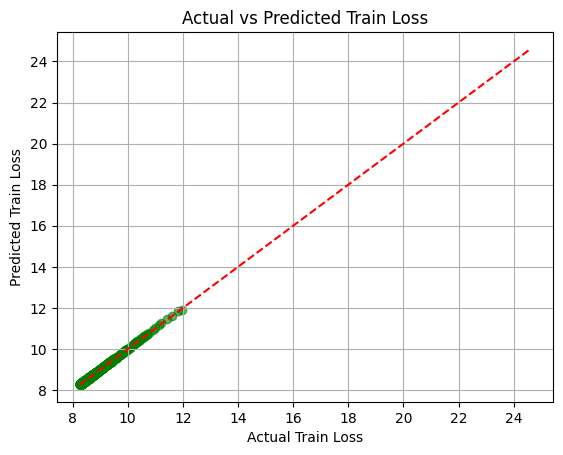

In [14]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Train Loss')
plt.ylabel('Predicted Train Loss')
plt.title('Actual vs Predicted Train Loss')
plt.grid(True)
plt.show()